In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#  loading the dataset
data =pd.read_parquet(r"D:\certificates\Structured_Data_Assignment\Structured_Data_Assignment\train.parquet")
data

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


# Data preprocessing 

This has been already done while prideciting the model. so we can straight away moving for the finding  dropoff reasons

In [46]:
# creating an object named target and saving the data
target =data[data['Incident']=='TARGET DRUG']
target

,Patient-Uid,Date,Incident
3294791,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG
3296990,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG
3305387,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG
3309423,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG
3309494,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG
...,...,...,...
29074998,a0ef2b6d-1c7c-11ec-9172-16262ee38c7f,2018-10-12,TARGET DRUG
29075105,a0ebe423-1c7c-11ec-a5e0-16262ee38c7f,2019-07-02,TARGET DRUG
29075494,a0ebc713-1c7c-11ec-bd53-16262ee38c7f,2019-05-21,TARGET DRUG
29080031,a0ee1bdb-1c7c-11ec-90ba-16262ee38c7f,2018-06-07,TARGET DRUG


In [47]:
# checking the data types from the dataframe for necessary conversions
target.dtypes

Patient-Uid            object
Date           datetime64[ns]
Incident               object
dtype: object

In [48]:
# import warning filter to ignore any warnings that arise during the execution of code
import warnings
warnings.filterwarnings('ignore')

In [49]:
# coconverting the date into datetime data types 
target['Date'] = pd.to_datetime(target['Date'])


In [50]:
target

,Patient-Uid,Date,Incident
3294791,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG
3296990,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG
3305387,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG
3309423,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG
3309494,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG
...,...,...,...
29074998,a0ef2b6d-1c7c-11ec-9172-16262ee38c7f,2018-10-12,TARGET DRUG
29075105,a0ebe423-1c7c-11ec-a5e0-16262ee38c7f,2019-07-02,TARGET DRUG
29075494,a0ebc713-1c7c-11ec-bd53-16262ee38c7f,2019-05-21,TARGET DRUG
29080031,a0ee1bdb-1c7c-11ec-90ba-16262ee38c7f,2018-06-07,TARGET DRUG


In [52]:
# creating a column named month and storing the exact moth from the date column for finding dropoff rates interval
target['Month'] = target['Date'].dt.month 
target

,Patient-Uid,Date,Incident,Month
3294791,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG,4
3296990,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG,6
3305387,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG,6
3309423,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG,11
3309494,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG,3
...,...,...,...,...
29074998,a0ef2b6d-1c7c-11ec-9172-16262ee38c7f,2018-10-12,TARGET DRUG,10
29075105,a0ebe423-1c7c-11ec-a5e0-16262ee38c7f,2019-07-02,TARGET DRUG,7
29075494,a0ebc713-1c7c-11ec-bd53-16262ee38c7f,2019-05-21,TARGET DRUG,5
29080031,a0ee1bdb-1c7c-11ec-90ba-16262ee38c7f,2018-06-07,TARGET DRUG,6


# finding number of dropoff's per month for a period of one year

In [53]:
# creating dropoff object and getting the unique values from it
dropoff_rates = target.groupby('Month')['Patient-Uid'].nunique()
dropoff_rates

Month
1     3882
2     3681
3     3975
4     4442
5     4834
6     4887
7     5171
8     5050
9     3457
10    3719
11    3590
12    3662
Name: Patient-Uid, dtype: int64

In [56]:
# finding the difference between the dropoff rate from previous month
dropoff=dropoff_rates.diff()
dropoff.isnull().sum()

1

In [57]:
#  filling the nan values with 0 to avoid the error
dropoff =dropoff.fillna(0)
dropoff.isnull().sum()

0

In [61]:
dropoff

Month
1        0.0
2     -201.0
3      294.0
4      467.0
5      392.0
6       53.0
7      284.0
8     -121.0
9    -1593.0
10     262.0
11    -129.0
12      72.0
Name: Patient-Uid, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

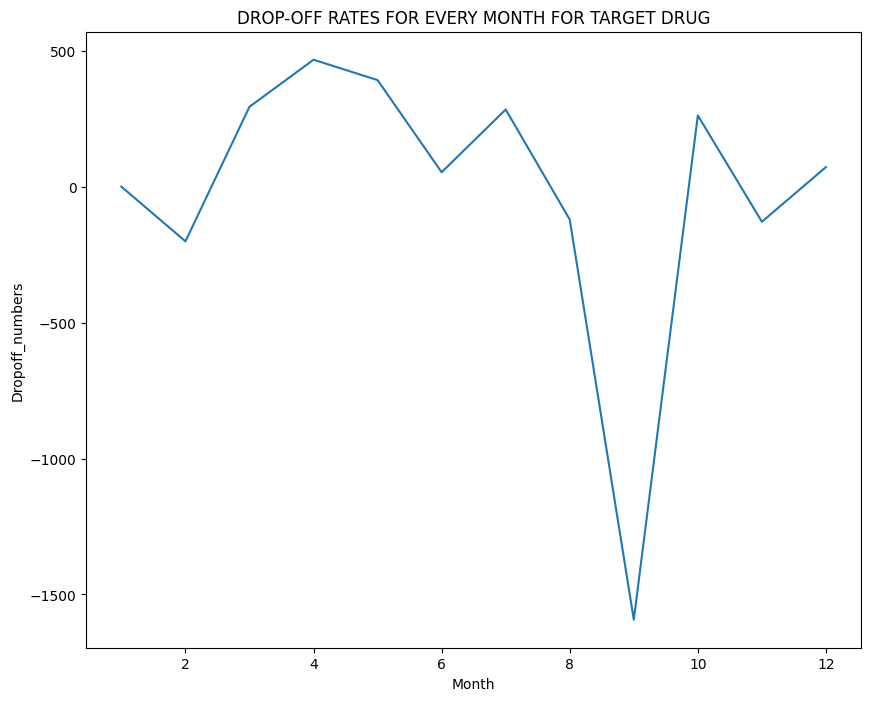

In [66]:
# visualizing the dropoff rates for better understanding 
plt.figure(figsize = (10, 8))
dropoff.plot()
plt.xlabel("Month")
plt.ylabel("Dropoff_numbers")
plt.title("DROP-OFF RATES FOR EVERY MONTH FOR TARGET DRUG")
plt.show

# Analysing the reason for dropoff rates

In [70]:
# looking for patients who are all in target drug 
drop_reasons =data[data['Patient-Uid'].isin(target['Patient-Uid'])]
drop_reasons

,Patient-Uid,Date,Incident
8,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2018-02-22,SYMPTOM_TYPE_6
22,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-02-21,SYMPTOM_TYPE_6
23,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,2017-05-11,SYMPTOM_TYPE_10
29,a0e9c414-1c7c-11ec-889a-16262ee38c7f,2019-11-22,PRIMARY_DIAGNOSIS
32,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,2020-01-28,PRIMARY_DIAGNOSIS
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [71]:
drop_reasons = drop_reasons[drop_reasons['Date'] < drop_reasons.groupby('Patient-Uid')['Date'].transform('max')]
drop_reasons

,Patient-Uid,Date,Incident
8,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2018-02-22,SYMPTOM_TYPE_6
22,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-02-21,SYMPTOM_TYPE_6
23,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,2017-05-11,SYMPTOM_TYPE_10
29,a0e9c414-1c7c-11ec-889a-16262ee38c7f,2019-11-22,PRIMARY_DIAGNOSIS
32,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,2020-01-28,PRIMARY_DIAGNOSIS
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [74]:
# reasons that lead to drop off 
drop_reasons = drop_reasons[drop_reasons['Incident'] != 'TARGET DRUG']
drop_reasons

,Patient-Uid,Date,Incident
8,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2018-02-22,SYMPTOM_TYPE_6
22,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-02-21,SYMPTOM_TYPE_6
23,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,2017-05-11,SYMPTOM_TYPE_10
29,a0e9c414-1c7c-11ec-889a-16262ee38c7f,2019-11-22,PRIMARY_DIAGNOSIS
32,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,2020-01-28,PRIMARY_DIAGNOSIS
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [76]:
# to calculate the frequency of each event leading to drop-off
event_frequency = drop_reasons['Incident'].value_counts()
event_frequency

Incident
PRIMARY_DIAGNOSIS    237455
DRUG_TYPE_6          201366
DRUG_TYPE_1          160903
DRUG_TYPE_2          146560
DRUG_TYPE_7          116819
DRUG_TYPE_0          111912
DRUG_TYPE_3           72745
DRUG_TYPE_8           43289
TEST_TYPE_1           42246
DRUG_TYPE_9           38383
DRUG_TYPE_11          25627
SYMPTOM_TYPE_0        24475
DRUG_TYPE_5           15196
SYMPTOM_TYPE_6        14507
TEST_TYPE_0           12642
DRUG_TYPE_10          12349
SYMPTOM_TYPE_7        10098
DRUG_TYPE_14           9901
DRUG_TYPE_13           6344
TEST_TYPE_3            5359
DRUG_TYPE_12           4958
SYMPTOM_TYPE_1         4511
TEST_TYPE_2            4199
SYMPTOM_TYPE_2         3887
SYMPTOM_TYPE_5         3602
SYMPTOM_TYPE_15        3515
SYMPTOM_TYPE_14        3302
SYMPTOM_TYPE_8         2886
DRUG_TYPE_15           2797
SYMPTOM_TYPE_10        2317
SYMPTOM_TYPE_9         2185
SYMPTOM_TYPE_16        2063
SYMPTOM_TYPE_4         1758
SYMPTOM_TYPE_29        1204
SYMPTOM_TYPE_11        1024
SYMPTOM_TYP

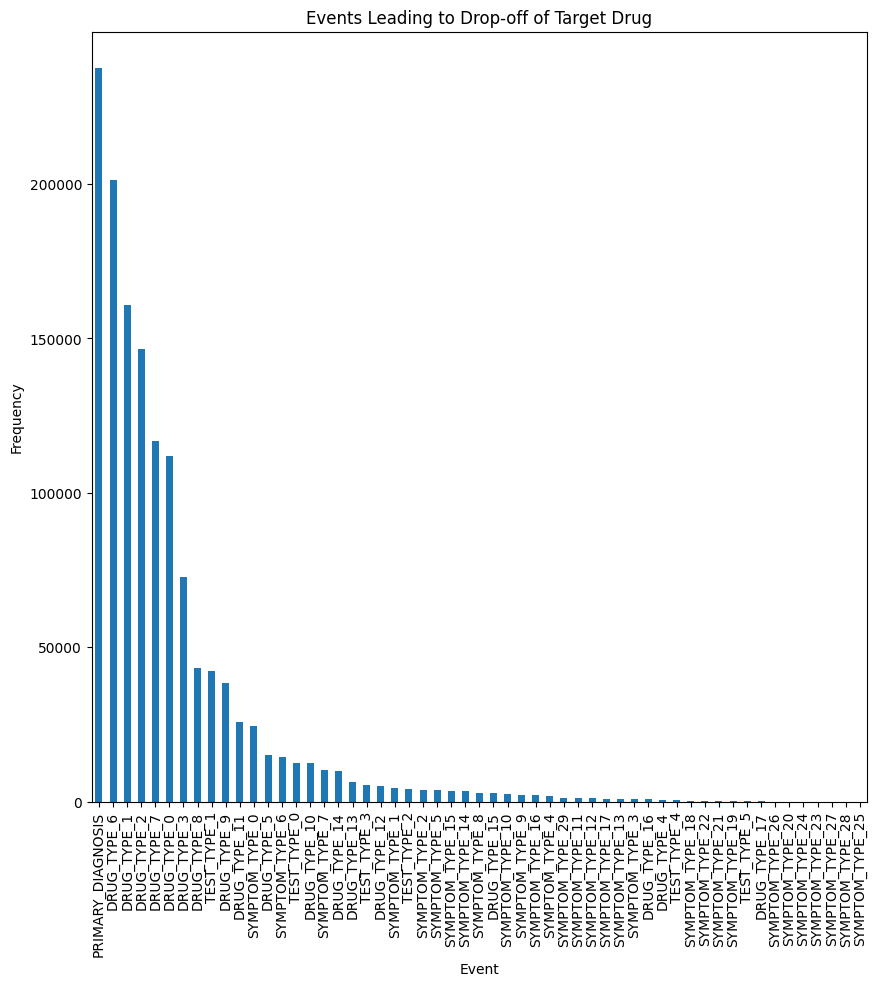

In [81]:
# visualizing the data
plt.figure(figsize=(10, 10))
event_frequency.plot(kind='bar')
plt.xlabel('Event')
plt.ylabel('Frequency')
plt.title('Events Leading to Drop-off of Target Drug')
plt.show()